In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import progressbar

plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.25

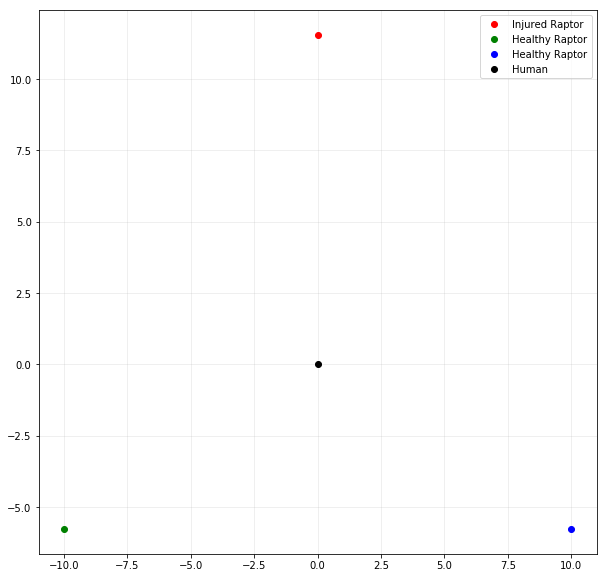

In [4]:
side_length = 20
height = side_length*(np.sqrt(3)/2)
offset = height - (side_length/np.sqrt(3))

injured_raptor_0 = [0, height - offset]
left_raptor_0 = [-side_length/2, -offset]
right_raptor_0 = [side_length/2, -offset]

plt.plot(*injured_raptor_0, 'o', color='r')
plt.plot(*left_raptor_0, 'o', color='g')
plt.plot(*right_raptor_0, 'o', color='b')
plt.plot(0, 0, 'o', color='k')
plt.legend(['Injured Raptor', 'Healthy Raptor', 'Healthy Raptor', 'Human'])
plt.show()

In [5]:
angle = np.radians(56)
c = np.array([np.cos(angle), np.sin(angle)]) # Already normalized
v_h = 6

In [6]:
def get_human_loc(ts):
    """Ts should be an array of time points"""
    human_loc = np.zeros((len(ts), 2))
    for i, t in enumerate(ts):
        human_loc[i] = v_h*t*c
    return human_loc

In [7]:
def raptor_velocity(t, r):
    human_pose = v_h*c*t
    return v_r*(human_pose - r)/np.linalg.norm(human_pose - r)

In [8]:
def raptor_ate_human(t, r):
    """Event to trigger a "root" was found and the solver should stop"""
    human_pose = v_h*c*t
    dist = np.linalg.norm(human_pose - r)
    if dist < 0.01:
        return 0
    return dist
raptor_ate_human.terminal = True

In [9]:
v_r = 20
sol_injured = solve_ivp(raptor_velocity, [0, 5], injured_raptor_0, dense_output=True, events=raptor_ate_human)
v_r = 25
sol_right = solve_ivp(raptor_velocity, [0, 5], right_raptor_0, dense_output=True, events=raptor_ate_human)
sol_left = solve_ivp(raptor_velocity, [0, 5], left_raptor_0, dense_output=True, events=raptor_ate_human)

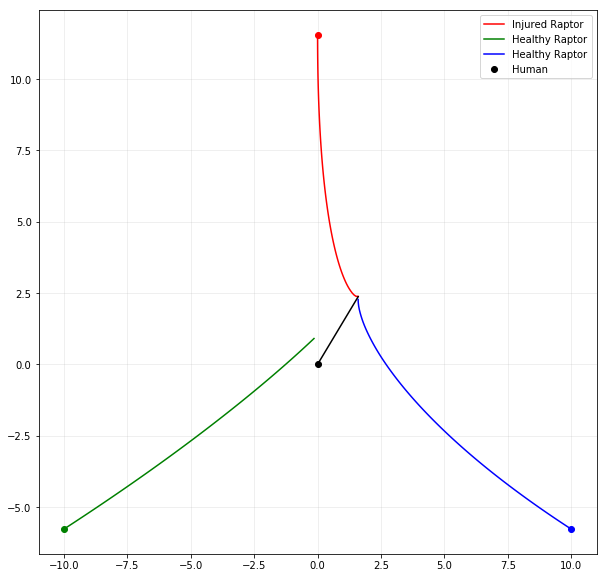

In [10]:
end_t = min(sol_left.t_events[0][0], sol_right.t_events[0][0], sol_injured.t_events[0][0])
t_points = np.linspace(0, end_t, 100)

plt.plot(sol_injured.sol(t_points)[0], sol_injured.sol(t_points)[1], color='r', label='Injured Raptor')
plt.plot(*injured_raptor_0, 'o', color='r')

plt.plot(sol_left.sol(t_points)[0], sol_left.sol(t_points)[1], color='g', label='Healthy Raptor')
plt.plot(*left_raptor_0, 'o', color='g')

plt.plot(sol_right.sol(t_points)[0], sol_right.sol(t_points)[1], color='b', label='Healthy Raptor')
plt.plot(*right_raptor_0, 'o', color='b')

human_loc = get_human_loc(t_points)
plt.plot(human_loc[0,0], human_loc[0,1], 'o', color='k', label='Human')
plt.plot(human_loc[:,0], human_loc[:,1], 'k')
plt.legend()
plt.show()

In [11]:
end_t

0.47689526354479894

In [12]:
sol_injured.t_events

[array([0.47689526])]

In [13]:
sol_left.t_events

[array([0.6295175])]

In [14]:
sol_right.t_events

[array([0.49459333])]

The injured raptor catches the human first, at 0.477s. Ouch!

# Problem 2

## Part C

In [15]:
true_sol = lambda t : np.sqrt((t + 1)**2 + 5) - 1

In [16]:
f = lambda t, y: (1 + t) / (1 + y)

In [18]:
def forward_Euler(f, tspan, y0, h=0.1, dense_output=False):
    if len(tspan) != 2:
        raise ValueError("tspan must be array of length 2")

    a, b = tspan[0], tspan[1]  
    # Initialize
    t = a
    w = y0
    # Loop
    while t < b:
        tNext = min(t+h,b)
        hh = tNext - t
        w += hh * f(t, w)
        t = tNext

    return w

In [20]:
w_guess = forward_Euler(f, [1, 2], 2, h=0.5)
w_guess


2.7083333333333335

In [33]:
np.abs(true_sol(2) - w_guess)

0.03332405344060785

In [34]:
(1/12) * (np.exp(1) - 1)

0.14319015237158708

## Part C

In [26]:
hs = np.logspace(-12, -5)
errors = []
true_val = true_sol(1 + 1e-5)
with progressbar.ProgressBar(max_value=len(hs_f)) as bar:
    for i, h in enumerate(hs):
        guess = forward_Euler(f, [1, 1 + 1e-5], 2, h=h)
        errors.append(np.abs(guess - true_val))
        bar.update(i)

Done with  0.0001
Done with  6.55128556859551e-05
Done with  4.291934260128778e-05
Done with  2.811768697974231e-05
Done with  1.8420699693267162e-05
Done with  1.2067926406393289e-05
Done with  7.906043210907702e-06
Done with  5.179474679231212e-06
Done with  3.3932217718953298e-06
Done with  2.2229964825261954e-06
Done with  1.4563484775012444e-06
Done with  9.540954763499925e-07
Done with  6.250551925273976e-07
Done with  4.094915062380419e-07
Done with  2.6826957952797275e-07
Done with  1.7575106248547893e-07
Done with  1.1513953993264481e-07
Done with  7.543120063354607e-08
Done with  4.9417133613238385e-08
Done with  3.23745754281764e-08
Done with  2.1209508879201927e-08
Done with  1.389495494373136e-08
Done with  9.102981779915189e-09
Done with  5.9636233165946364e-09
Done with  3.906939937054621e-09
Done with  2.559547922699533e-09
Done with  1.6768329368110032e-09
Done with  1.0985411419875571e-09
Done with  7.196856730011529e-10
Done with  4.71486636345739e-10
Done with  3.08

In [28]:
np.save('./errors.npy', np.array(errors))

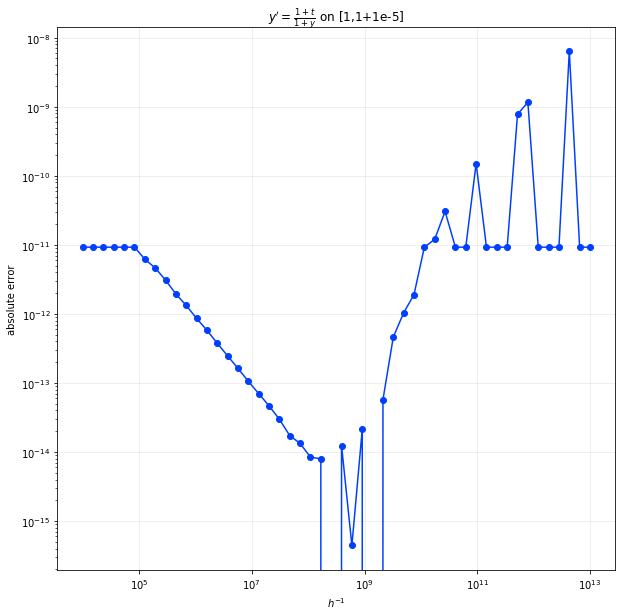

In [59]:
plt.plot(1/hs, errors, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$h^{-1}$')
plt.ylabel('absolute error')
plt.title('$y\' = \\frac{1 + t}{1 + y}$ on [1,1+1e-5]')
plt.show()

Values of h near $10^-9$ perform best. As h gets smaller than this, there begins to be some some underflow, which causes the error to start to increase again, and become unstable.

## Part F

In [52]:
hs_f = np.logspace(-4, -7)
errors_f = []
true_val = true_sol(2)
with progressbar.ProgressBar(max_value=len(hs_f)) as bar:
    for i, h in enumerate(hs_f):
        guess = forward_Euler(f, [1,2], 2, h=h)
        errors_f.append(np.abs(guess - true_val))
        bar.update(i)

100% (50 of 50) |########################| Elapsed Time: 0:02:03 Time:  0:02:03


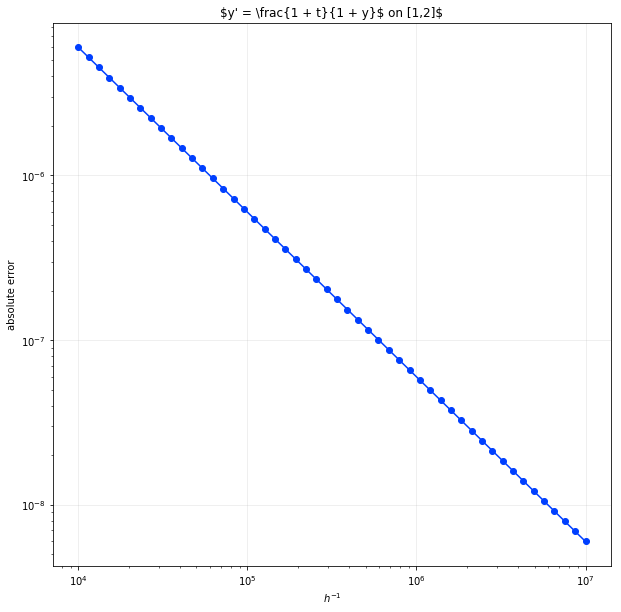

In [58]:
plt.plot(1/hs_f, errors_f, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$h^{-1}$')
plt.ylabel('absolute error')
plt.title('$y\' = \\frac{1 + t}{1 + y}$ on [1,2]')
plt.show()

The error in this case behaves much more nicely, there is no instability. Here an h value of $10^-7$ performs best, although this is the boundary of my experiment, so it is possible that it would be an even smaller h.